In [3]:
# Import necessary libraries
import time
import pandas as pd
import asyncio
from transformers import AutoTokenizer

from ofen.models.text_tokenizer import TextTokenizer

tokenizer1 = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer2 = TextTokenizer.from_pretrained("bert-base-uncased")

test_sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "In a distant land, far beyond the reaches of any known map, there lies a hidden valley shrouded in mist and mystery.",
    "To be, or not to be, that is the question: Whether 'tis nobler in the mind to suffer the slings and arrows of outrageous fortune, or to take arms against a sea of troubles and by opposing end them.",
    "Once upon a time in a small village nestled between the mountains, there lived a young girl with a heart full of dreams and a spirit that could not be tamed.",
    "Artificial intelligence and machine learning are rapidly advancing fields that are transforming industries and reshaping the future of technology."
] * 10000

# Function to benchmark tokenizer1
def benchmark_tokenizer(sentences, batch_size):
    start_time = time.time()
    for i in range(0, len(sentences), batch_size):
        tokenizer1(sentences[i:i + batch_size])
    end_time = time.time()
    return end_time - start_time


# Run benchmarks for different batch sizes
batch_sizes = [1, 4, 8, 16, 32, 64, 128, 256, 512]
results = []

for batch_size in batch_sizes:
    tokenizer1_time = benchmark_tokenizer(test_sentences, batch_size)
    time.sleep(1)
    tokenizer2_time = benchmark_tokenizer(test_sentences, batch_size)
    results.append({
        'batch_size': batch_size,
        'tokenizer1_time': tokenizer1_time,
        'tokenizer2_time': tokenizer2_time
    })


/Users/juliuslipp/projects/current/mixedbread/mixedbread-ai/packages/ofen/.venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


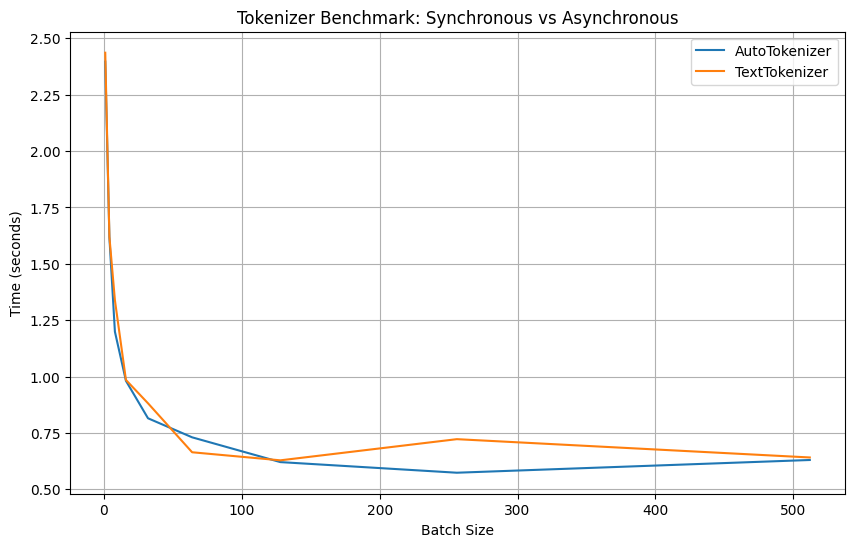

In [4]:
df_results = pd.DataFrame(results)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_results['batch_size'], df_results['tokenizer1_time'], label='AutoTokenizer')
plt.plot(df_results['batch_size'], df_results['tokenizer2_time'], label='TextTokenizer')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.title('Tokenizer Benchmark: Synchronous vs Asynchronous')
plt.legend()
plt.grid(True)
plt.show()